#Anime Recomendation System
## Content-Base-Filtering
### Sklearn TF-IDF
Dataset : [Kaggle-Anime-Recomendation-Dataset](https://www.kaggle.com/datasets/CooperUnion/anime-recommendations-database)

## Data Collection

In [338]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from google.colab import drive
import warnings
warnings.filterwarnings('ignore' )
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import os
import re

In [339]:
drive.mount('/content/gdrive')
os.environ['KAGGLE_CONFIG_DIR'] = '/content/gdrive/My Drive/Kaggle'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [340]:
cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [341]:
pwd

'/content/gdrive/My Drive/Kaggle'

In [342]:
!kaggle datasets download -d CooperUnion/anime-recommendations-database

anime-recommendations-database.zip: Skipping, found more recently modified local copy (use --force to force download)


In [343]:
ls

 anime-dataset/
 anime-recommendations-database.zip
 CategoryModel_3Class.h5
 cell-images-for-detecting-malaria.zip
 dataset/
'fasionstyle(tf_lite).h5'
'IMDB Log.csv'
 imdb-review-dataset.zip
 IMDB_sentiment_analisis.csv
 kaggle.json
 logs/
'oregon_wildlife(tf_lite)Log.csv'
 steam-dataset/
 steam-video-games.zip
 trainingTwiterLog.csv
 twiterredditsentimentanalyis/
 twitter-and-reddit-sentimental-analysis-dataset.zip
 zalando-store-crawl.zip


In [344]:
dataset = 'anime-recommendations-database.zip'
extract_directory = 'anime-dataset/'
filename_anime = 'anime.csv'
filename_rating = 'rating.csv'
top_item = 5

In [345]:
#Extract Dataset
import zipfile as zf

try:
  extract_dataset = zf.ZipFile(dataset)
  extract_dataset.extractall(extract_directory)
  extract_dataset.close()
  print('Zip Extraction Success')
  
except(FileNotFoundError,FileExistsError):
  print('Dataset Not Found')
except:
  print('Unexpected Error')
finally:
  print('End Extraction process')

Zip Extraction Success
End Extraction process


In [346]:
# File Preview
import os
MainDirlist = os.listdir(extract_directory)

print(MainDirlist)

print('\nScanning Directory {}'.format(extract_directory))

dataset_list = []

for i in MainDirlist:
    dir = os.path.join(extract_directory, i)
    dataset_list.append(dir)
    print('directory result {}'.format(dir))

['anime.csv', 'rating.csv']

Scanning Directory anime-dataset/
directory result anime-dataset/anime.csv
directory result anime-dataset/rating.csv


In [347]:
anime_dataset, rating_dataset = dataset_list

In [348]:
df_anime = pd.read_csv(anime_dataset)
df_anime_rating = pd.read_csv(rating_dataset)

## Data Understanding

In [349]:
df_anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [350]:
df_anime.shape

(12294, 7)

In [351]:
df_anime_rating.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [352]:
df_anime_rating.shape

(7813737, 3)

In [353]:
df_anime.nunique()

anime_id    12294
name        12292
genre        3264
type            6
episodes      187
rating        598
members      6706
dtype: int64

In [354]:
df_anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [355]:
df_anime_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB


In [356]:
df_anime.isna().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [357]:
df_anime = df_anime.dropna()

In [358]:
df_anime.shape

(12017, 7)

In [359]:
df_anime_rating.isna().sum()

user_id     0
anime_id    0
rating      0
dtype: int64

In [360]:
df_anime.value_counts()

anime_id  name                                                       genre                                            type     episodes  rating  members
1         Cowboy Bebop                                               Action, Adventure, Comedy, Drama, Sci-Fi, Space  TV       26        8.82    486824     1
19069     Okane wa Mawaru: Kurashi to Kinyuu                         Slice of Life                                    OVA      1         5.31    92         1
19021     Takanashi Rikka Kai: Chuunibyou demo Koi ga Shitai! Movie  Comedy, Drama, Romance, School, Slice of Life    Movie    1         7.37    34272      1
19023     Wake Up, Girls!                                            Drama, Music                                     TV       12        7.04    29679      1
19029     Yuyushiki: Nyanyashiki                                     Comedy                                           Special  6         6.32    6805       1
                                                         

In [361]:
df_anime_rating.value_counts()

user_id  anime_id  rating
42653    16498      8        2
1        20        -1        1
49543    370        8        1
         430        9        1
         421        3        1
                            ..
24617    6347       9        1
         6324       8        1
         6205       7        1
         6201       7        1
73516    8074       9        1
Length: 7813736, dtype: int64

### Function Utils and Chart

In [362]:
def CheckDuplication(dataset):
  dup = dataset[dataset.duplicated()].shape[0]
  print('Duplication: ', dup)
  print('From Total ', dataset.shape[0])
  return dup

In [363]:
def dropDuplication(dataset):
  state = dataset.copy()
  dataset.drop_duplicates(keep='first',inplace = True)
  prev = state.shape[0]
  newShape = dataset.shape[0]
  print('Previous Shape: ', prev)
  print('New Dataset Shape After Duplication Drop: ', newShape)
  print('Duplicated Data Dropped: ', (prev - newShape))
  return dataset

In [364]:
def piePlotting(category, title, label, colors):
  plt.figure(figsize = (10,7))
  plt.title(title)
  plt.pie(category,
          labels = label,
          colors = colors,
          autopct = '%.2f %%'
          )
          
  plt.show()

In [365]:
def cleaningText(text):
    text = re.sub(r'&#039;', '', text)
    text = re.sub(r'&quot;', '', text)
    text = re.sub(r'.hack//', '', text)
    text = re.sub(r'I&#039;', 'I\'', text)
    text = re.sub(r'A&#039;s', '', text)
    text = re.sub(r'&amp;', 'and', text)
    return text

In [366]:
def pieChart(dataset, title):
  dataset.value_counts().head().plot(
      kind = 'pie',
      figsize =(20,8), 
      autopct = '%1.1f%%', 
      title = title)

In [367]:
def plotBar(data, yLabel, xLabel, Title, endcolor = 'black'):
  plt.hist(data, edgecolor=endcolor)
  plt.ylabel(yLabel)
  plt.xlabel(xLabel)
  plt.title(Title)
  plt.show()

In [368]:
def PlotBarXaxis(data, 
                 titles, 
                 label = [], 
                 value = [],  
                 fontdict = {'fontsize' : 20}):
  plt.figure(figsize = (20,15))
  dataset_select = data

  labels = dataset_select[label].values.flatten()
  values = dataset_select[value].values.flatten()

  plt.barh(labels, values, edgecolor='black')
  plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='x', alpha=0.7)
  plt.xticks(fontsize = 15)
  plt.yticks(fontsize = 15)
  plt.title(titles, fontdict = fontdict)
  plt.show()

  plt.show()

In [369]:
CheckDuplication(df_anime)

Duplication:  0
From Total  12017


0

In [370]:
CheckDuplication(df_anime_rating)

Duplication:  1
From Total  7813737


1

## Univariate Exploratory Data Analysis

In [371]:
df_anime.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,anime_id,rating,members
count,12017.00,12017.00,12017.00
mean,13638.00,6.48,18348.88
std,11231.08,1.02,55372.50
min,1.00,1.67,12.00
25%,3391.00,5.89,225.00
50%,9959.00,6.57,1552.00
75%,23729.00,7.18,9588.00
max,34519.00,10.00,1013917.00


In [372]:
df_anime_rating.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,user_id,anime_id,rating
count,7813737.00,7813737.00,7813737.00
mean,36727.96,8909.07,6.14
std,20997.95,8883.95,3.73
min,1.00,1.00,-1.00
25%,18974.00,1240.00,6.00
50%,36791.00,6213.00,7.00
75%,54757.00,14093.00,9.00
max,73516.00,34519.00,10.00


In [373]:
df_anime_rating = df_anime_rating[~(df_anime_rating.rating == -1)]

In [374]:
df_anime_rating.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,user_id,anime_id,rating
count,6337241.00,6337241.00,6337241.00
mean,36747.91,8902.87,7.81
std,21013.40,8882.00,1.57
min,1.00,1.00,1.00
25%,18984.00,1239.00,7.00
50%,36815.00,6213.00,8.00
75%,54873.00,14075.00,9.00
max,73516.00,34475.00,10.00


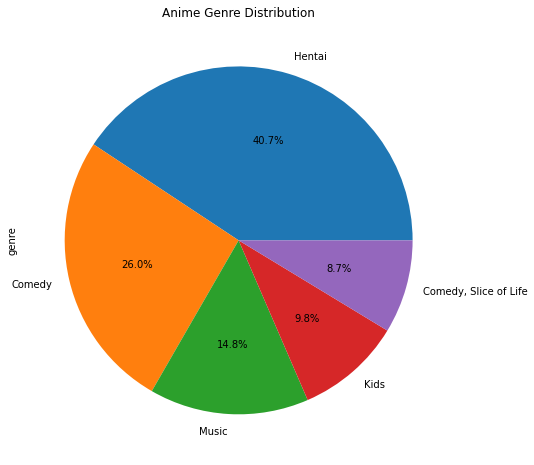

In [375]:
pieChart(df_anime['genre'], 
         'Anime Genre Distribution')

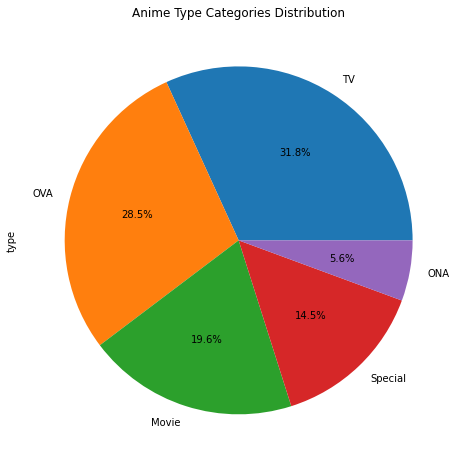

In [376]:
pieChart(df_anime['type'], 
         'Anime Type Categories Distribution')

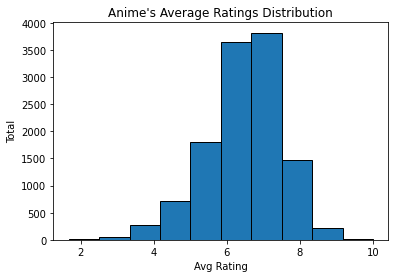

In [377]:
plotBar(df_anime.rating, 
        'Total', 
        'Avg Rating', 
        "Anime's Average Ratings Distribution")

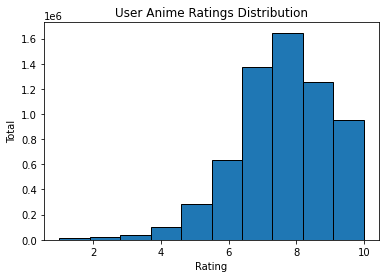

In [378]:
plotBar(df_anime_rating.rating, 
        'Total', 
        'Rating', 
        "User Anime Ratings Distribution")

## Multvarite Exploratory Data Analysis

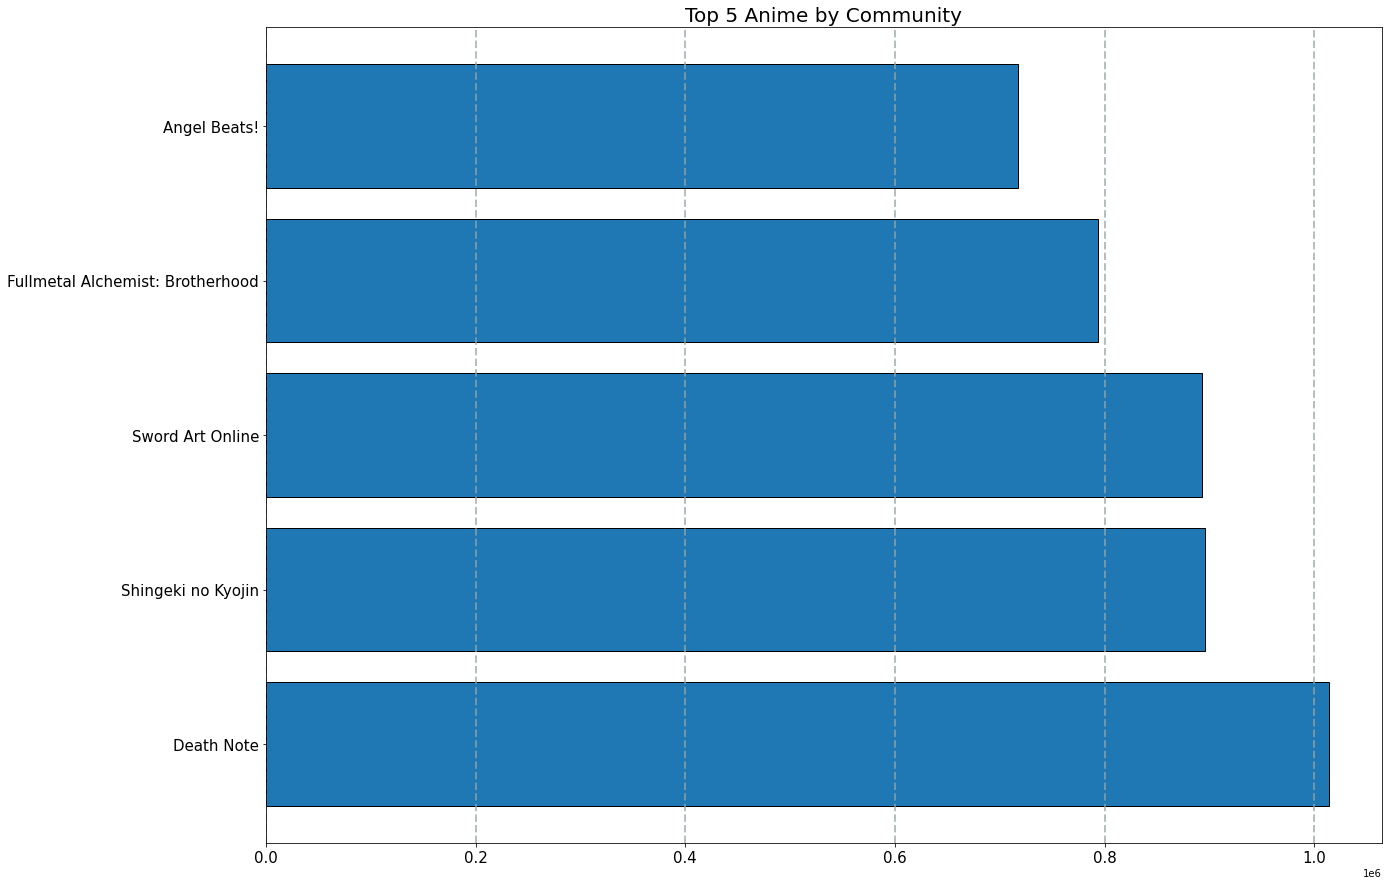

In [379]:
PlotBarXaxis(df_anime[['name', 'members']].sort_values(by = 'members', ascending = False).head(top_item),
             f"Top {top_item} Anime by Community", 
             ['name'], 
             ['members'])

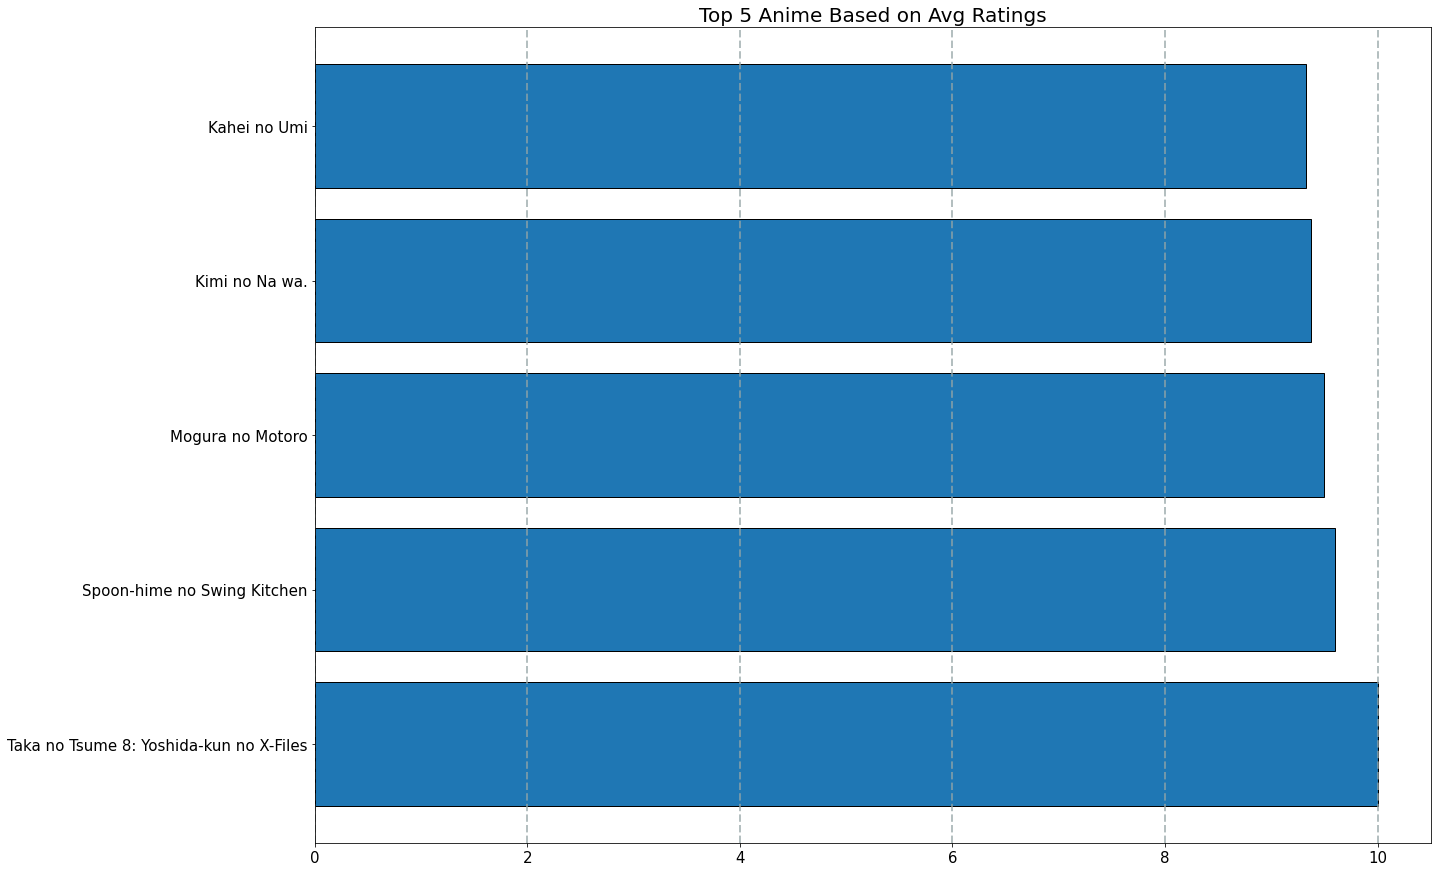

In [380]:
# Plot Anime base on AVG Rating
PlotBarXaxis(df_anime[['name', 'rating']].sort_values(by = 'rating', ascending = False).head(top_item), 
             f"Top {top_item} Anime Based on Avg Ratings",  
             ['name'], 
             ['rating'])

In [381]:
df_anime_rating.head()

,user_id,anime_id,rating
47,1,8074,10
81,1,11617,10
83,1,11757,10
101,1,15451,10
153,2,11771,10


In [382]:
# Calculate rating contribution
anime_rating_contribution = df_anime_rating.groupby('anime_id').count()
anime_rating_contribution.head()

,user_id,rating
anime_id,,
1,13449,13449
5,5790,5790
6,9385,9385
7,2169,2169
8,308,308


## Data Preparation

In [383]:
print('Data Cleaning: ')
print('Anime')
anime = dropDuplication(df_anime)
print('Anime Rating')
anime_rating = dropDuplication(df_anime_rating)

Data Cleaning: 
Anime
Previous Shape:  12017
New Dataset Shape After Duplication Drop:  12017
Duplicated Data Dropped:  0
Anime Rating
Previous Shape:  6337241
New Dataset Shape After Duplication Drop:  6337240
Duplicated Data Dropped:  1


In [384]:
anime.dropna()
anime_rating.dropna()

,user_id,anime_id,rating
47,1,8074,10
81,1,11617,10
83,1,11757,10
101,1,15451,10
153,2,11771,10
...,...,...,...
7813732,73515,16512,7
7813733,73515,17187,9
7813734,73515,22145,10
7813735,73516,790,9


In [385]:
df_anime['name'] = df_anime['name'].apply(cleaningText)
df_anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


### Dataset Fussion
(anime and anime_rating) merge

In [386]:
df_anime_raw = df_anime.drop(['rating'], axis = 'columns')
df_fussion = pd.merge(anime_rating_contribution, df_anime_raw, on = 'anime_id', how = 'left')
df_fussion.sort_values(by='rating', ascending=False).head(10)

,anime_id,user_id,rating,name,genre,type,episodes,members
1388,1535,34226,34226,Death Note,"Mystery, Police, Psychological, Supernatural, ...",TV,37,1013917.0
6323,11757,26310,26310,Sword Art Online,"Action, Adventure, Fantasy, Game, Romance",TV,25,893100.0
7059,16498,25290,25290,Shingeki no Kyojin,"Action, Drama, Fantasy, Shounen, Super Power",TV,25,896229.0
1426,1575,24126,24126,Code Geass: Hangyaku no Lelouch,"Action, Mecha, Military, School, Sci-Fi, Super...",TV,25,715151.0
4567,6547,23565,23565,Angel Beats!,"Action, Comedy, Drama, School, Supernatural",TV,13,717796.0
201,226,23528,23528,Elfen Lied,"Action, Drama, Horror, Psychological, Romance,...",TV,13,623511.0
10,20,22071,22071,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,683297.0
3936,5114,21494,21494,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,793665.0
99,121,21332,21332,Fullmetal Alchemist,"Action, Adventure, Comedy, Drama, Fantasy, Mag...",TV,51,600384.0
2642,2904,21124,21124,Code Geass: Hangyaku no Lelouch R2,"Action, Drama, Mecha, Military, Sci-Fi, Super ...",TV,25,572888.0


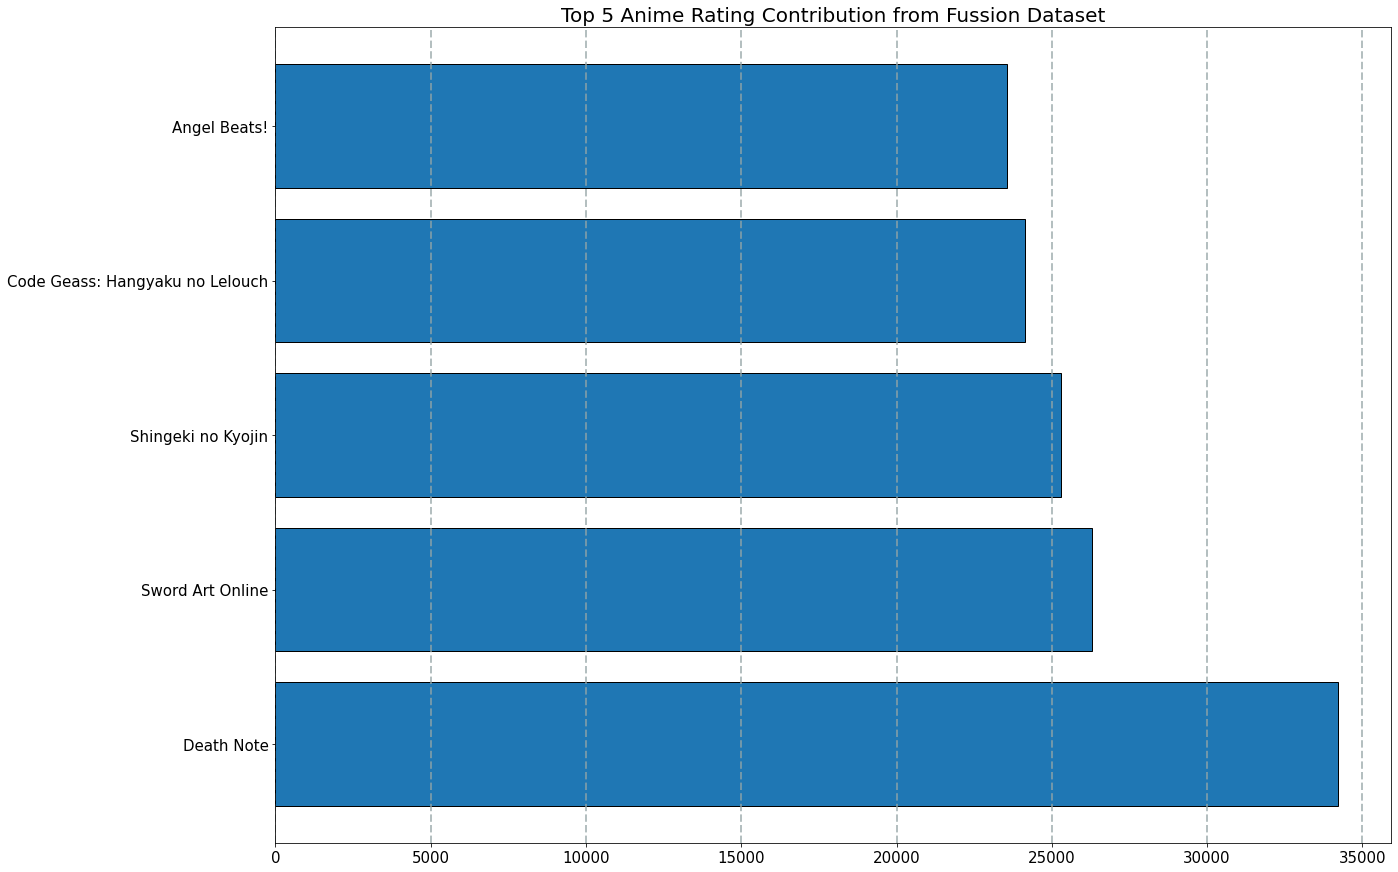

In [387]:
PlotBarXaxis(df_fussion[['name', 'rating']].sort_values(by = 'rating',ascending = False).head(top_item), 
             f"Top {top_item} Anime Rating Contribution from Fussion Dataset",  
             ['name'], 
             ['rating'])

## Modeling and Result

In [388]:
# TF-IDF
tf = TfidfVectorizer()
tf.fit(df_anime['genre']) 
tf.get_feature_names()

['action',
 'adventure',
 'ai',
 'arts',
 'cars',
 'comedy',
 'dementia',
 'demons',
 'drama',
 'ecchi',
 'fantasy',
 'fi',
 'game',
 'harem',
 'hentai',
 'historical',
 'horror',
 'josei',
 'kids',
 'life',
 'magic',
 'martial',
 'mecha',
 'military',
 'music',
 'mystery',
 'of',
 'parody',
 'police',
 'power',
 'psychological',
 'romance',
 'samurai',
 'school',
 'sci',
 'seinen',
 'shoujo',
 'shounen',
 'slice',
 'space',
 'sports',
 'super',
 'supernatural',
 'thriller',
 'vampire',
 'yaoi',
 'yuri']

In [389]:
tfidf_matrix = tf.fit_transform(df_anime['genre'])
tf_shape = tfidf_matrix.shape
print('tfidf Shape: ', tf_shape)
tfidf_matrix.todense()

tfidf Shape:  (12017, 47)


matrix([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.29498527, 0.3162867 , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.2516182 , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

In [390]:
pd.DataFrame(
    tfidf_matrix.todense(), 
    columns=tf.get_feature_names(),
    index= df_anime.name
).sample(tf_shape[1], axis=1).sample(5, axis=0)

,mecha,sports,yuri,music,police,adventure,power,josei,shoujo,action,...,hentai,slice,ecchi,of,vampire,magic,sci,cars,yaoi,harem
name,,,,,,,,,,,,,,,,,,,,,
Kaiketsu Zorori: Mahoutsukai no Deshi/Dai Kaizoku no Takara Sagashi,0.0,0.0,0.0,0.000000,0.0,0.802761,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
Dr. Slump Movie 01: Arale-chan Hello! Fushigi Shima,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.525884,0.0,0.0,0.0
Shounen Muku Hatojuu Monogatari,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
Bacterial Contamination,0.0,0.0,0.0,0.481016,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
Aoi Bungaku Series,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [391]:
cosine_sim = cosine_similarity(tfidf_matrix) 
cosine_sim

array([[1.        , 0.14715318, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.14715318, 1.        , 0.17877808, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.17877808, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ]])

In [392]:
anime_sim_df = pd.DataFrame(cosine_sim, 
                            index= df_anime['name'], 
                            columns= df_anime['name'])
print('Shape:', anime_sim_df.shape)
 
anime_sim_df.sample(5, axis=1).sample(top_item, axis=0)

Shape: (12017, 12017)


name,Tokai no Butchy,Baku Tech! Bakugan Gachi: Tokubetsu-hen,Sekai Meisaku Douwa: Mori wa Ikiteiru,Naruto,Chinyuuki: Tarou to Yukai na Nakama-tachi
name,,,,,
Columbos,0.000000,0.000000,0.000000,0.000000,0.0
Hello Kitty no Shirayuki-hime (OVA),0.000000,0.000000,1.000000,0.000000,0.0
Sekiei Ayakashi Mangatan,0.000000,0.000000,0.309172,0.000000,0.0
Mobile Suit Gundam: The 08th MS Team,0.239513,0.000000,0.000000,0.000000,0.0
Gunslinger Girl,0.000000,0.110156,0.000000,0.070712,0.0


## Evaluation

In [393]:
def recommendations(name, similarity_data=anime_sim_df, items= df_anime[['name', 'genre']], k=top_item):
 
    index = similarity_data.loc[:,name].to_numpy().argpartition(
        range(-1, -k, -1))    
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    closest = closest.drop(name, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

In [394]:
def makeRecomentdationWithValidator(title):
  verifyTitle = df_anime[df_anime.name.eq(title)]
  if(len(verifyTitle) <= 0):
    print('Title `{}` not Available'.format(title))
    return
  print('Recomendation Source:')
  return recommendations(title)


In [395]:
makeRecomentdationWithValidator('Sword Art Onlinex')

Title `Sword Art Onlinex` not Available


In [396]:
makeRecomentdationWithValidator('Bleach')

Recomendation Source:


,name,genre
0,Bleach Movie 3: Fade to Black - Kimi no Na wo ...,"Action, Comedy, Shounen, Super Power, Supernat..."
1,Bleach Movie 4: Jigoku-hen,"Action, Comedy, Shounen, Super Power, Supernat..."
2,Code:Breaker,"Action, Comedy, School, Shounen, Super Power, ..."
3,Yozakura Quartet: Tsuki ni Naku,"Action, Comedy, Magic, Shounen, Super Power, S..."
4,Yozakura Quartet: Hoshi no Umi,"Action, Comedy, Magic, Shounen, Super Power, S..."


In [397]:
makeRecomentdationWithValidator('Sword Art Online')

Recomendation Source:


,name,genre
0,Sword Art Online II,"Action, Adventure, Fantasy, Game, Romance"
1,Sword Art Online: Extra Edition,"Action, Adventure, Fantasy, Game, Romance"
2,Sword Art Online II: Debriefing,"Action, Adventure, Fantasy, Game"
3,Bakugan Battle Brawlers,"Action, Fantasy, Game"
4,Monster Strike: Mermaid Rhapsody,"Action, Fantasy, Game"


In [398]:
makeRecomentdationWithValidator('Dragon Ball')

Recomendation Source:


,name,genre
0,Dragon Ball Z Movie 11: Super Senshi Gekiha!! ...,"Action, Adventure, Comedy, Fantasy, Martial Ar..."
1,Dragon Ball Z,"Action, Adventure, Comedy, Fantasy, Martial Ar..."
2,Dragon Ball Super,"Action, Adventure, Comedy, Fantasy, Martial Ar..."
3,Dragon Ball GT: Goku Gaiden! Yuuki no Akashi w...,"Action, Adventure, Comedy, Fantasy, Martial Ar..."
4,Dragon Ball Z Movie 15: Fukkatsu no F,"Action, Adventure, Comedy, Fantasy, Martial Ar..."
